<div class="alert alert-block alert-danger"><span style="font-size:150%"><b>K-Means Clustering -</b></span>

<span style="font-family:Comic Sans MS">K-Mean clustering is an unsupervised machine learning algorithm that divides the given data into the given number of clusters. It is a centroid based algorithm where each cluster is associated with a centroid.
The main aim of this algorithm is to minimize the sum distance between the data points and their respective clusters.</span></div>

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Suppress Warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Customers.csv")
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,35000,81
2,3,Female,20,86000,6
3,4,Female,23,59000,77
4,5,Female,31,38000,40
...,...,...,...,...,...
1995,1996,Female,71,184387,40
1996,1997,Female,91,73158,32
1997,1998,Male,87,90961,14
1998,1999,Male,77,182109,4


In [4]:
df1 = df[['Age','Annual Income ($)','Spending Score (1-100)']]
df1.corr()

,Age,Annual Income ($),Spending Score (1-100)
Age,1.000000,0.021378,-0.041798
Annual Income ($),0.021378,1.000000,0.023299
Spending Score (1-100),-0.041798,0.023299,1.000000


In [5]:
df.shape

(2000, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 78.3+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100)
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500
std,577.494589,28.429747,45739.536688,27.934661
min,1.000000,0.000000,0.000000,0.000000
25%,500.750000,25.000000,74572.000000,28.000000
50%,1000.500000,48.000000,110045.000000,50.000000
75%,1500.250000,73.000000,149092.750000,75.000000
max,2000.000000,99.000000,189974.000000,100.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
dtype: int64

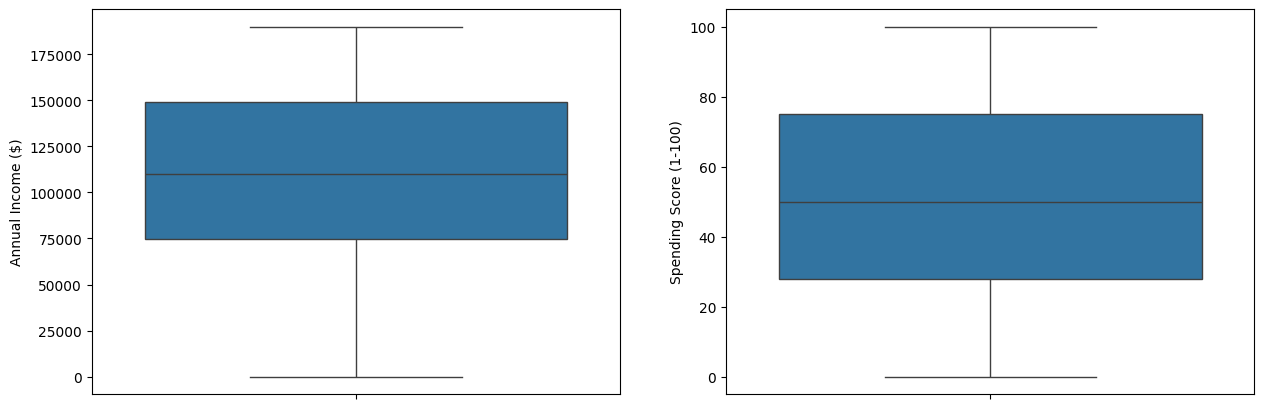

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) # 1 row 2 coln 1 fig
sns.boxplot(data=df, y="Annual Income ($)")

plt.subplot(1,2,2)  #1 row 2 coln 2nd fig
sns.boxplot(data=df, y="Spending Score (1-100)")


plt.show()

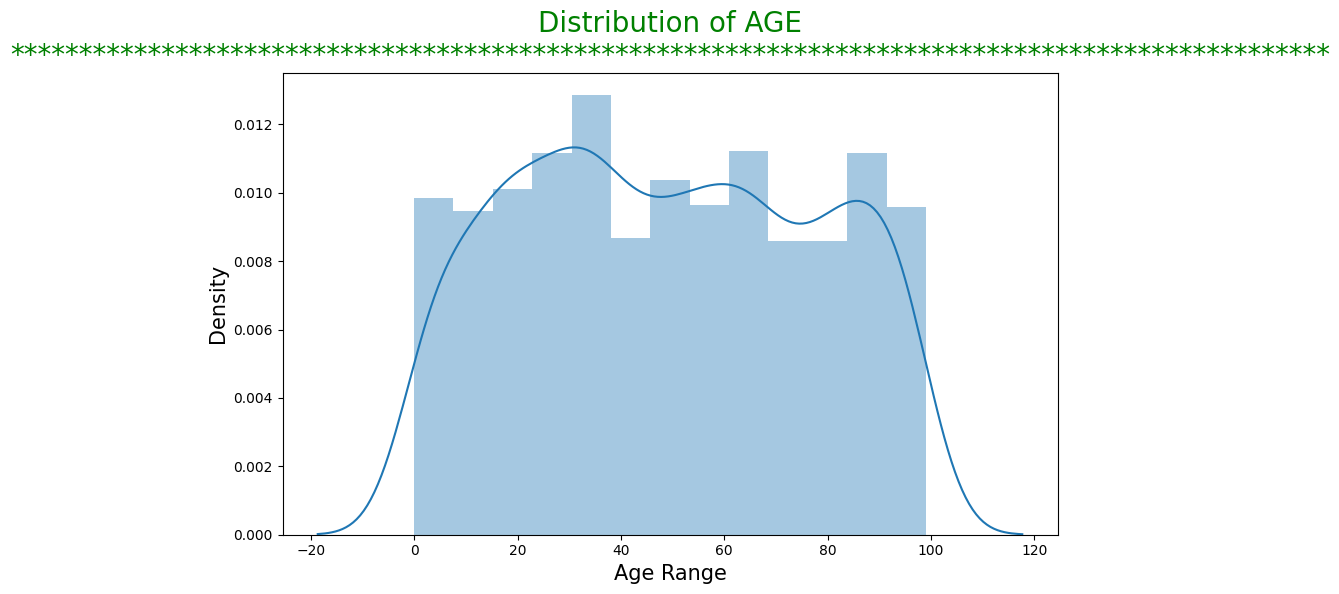

In [10]:
# Checking Age Distribution (eda:univarent analysis)

plt.figure(figsize=(10,6))
# sns.set_style('darkgrid')

sns.displot(df.Age)
plt.title("Distribution of AGE\n************************************************************************************************", fontsize=20, color="green")
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()


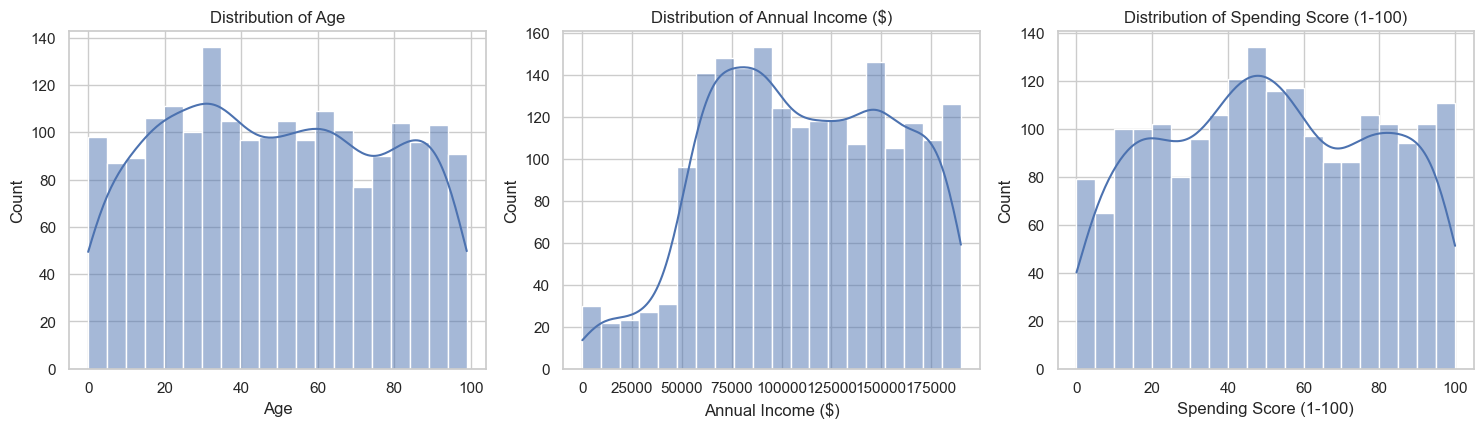

In [86]:
sns.set(style="whitegrid")

# Visualizing the distribution of numerical features
plt.figure(figsize=(15, 8))

# Histograms for numerical features
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

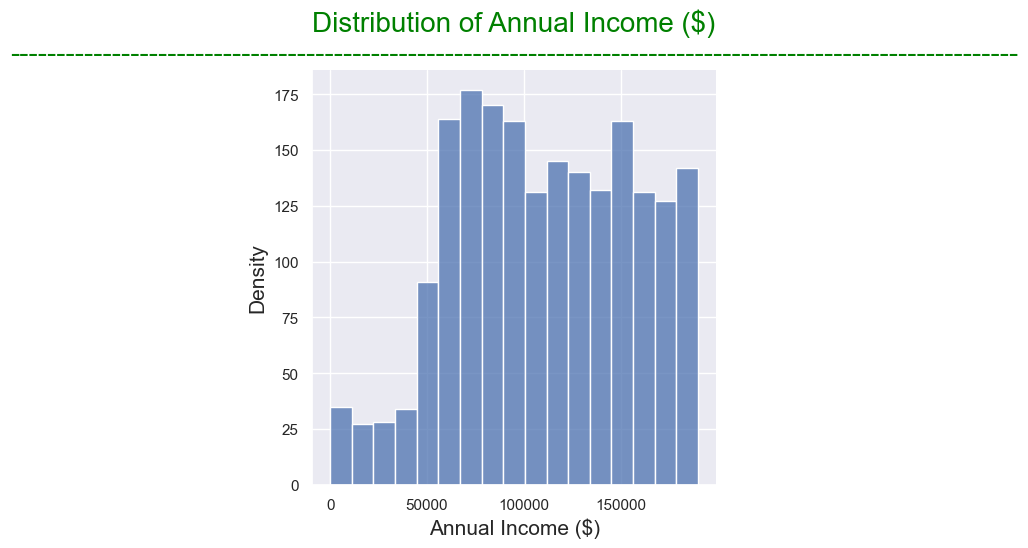

In [85]:
#dstribution plot of annual income

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.displot(df["Annual Income ($)"])
plt.title("Distribution of Annual Income ($)\n-------------------------------------------------------------------------------------------------------------", fontsize=20, color="green")
plt.xlabel("Annual Income ($)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - Most of the annual income falls between 60K to 160K.</code>

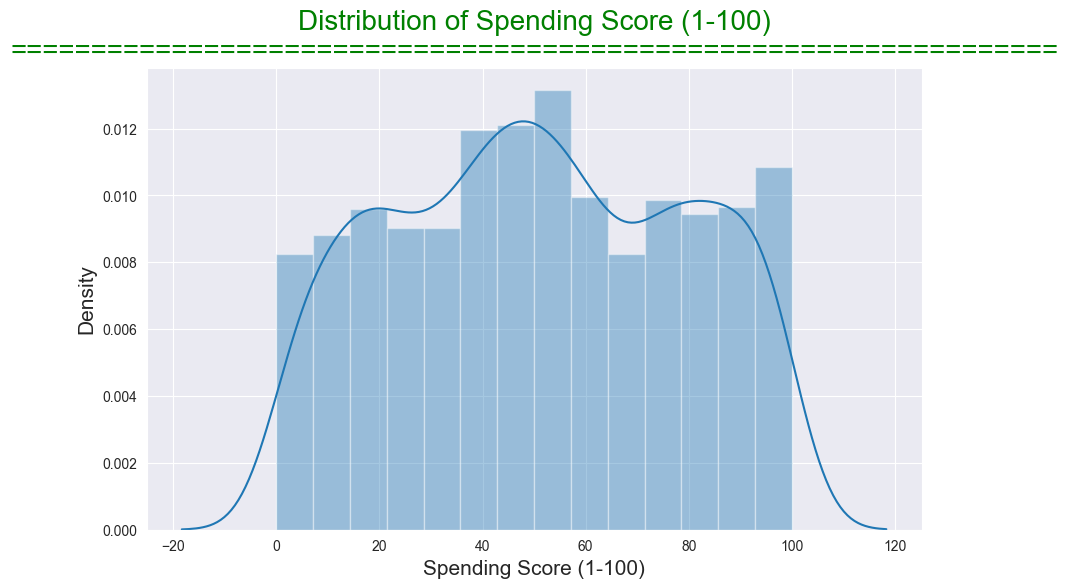

In [12]:
# Spending Score (1-100) Distribution
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - Most of the customers got the score ranging between 40 to 60</code>

<code style="background:skyblue;color:black">3.2 Univariate Analysis - Categorical Data Type</code>

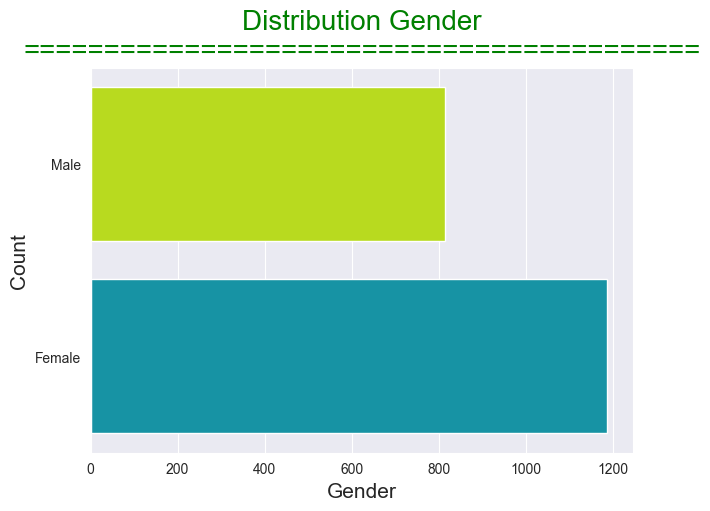

In [13]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
plt.title("Distribution Gender\n==========================================", fontsize=20, color="green")
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
sns.countplot(df.Gender, palette="nipy_spectral_r")
plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - Female customers are more as compared to the male customers</code>

<code style="background:skyblue;color:black">3.3 Bivariate Analysis - Numerical-Numerical Data Type</code>

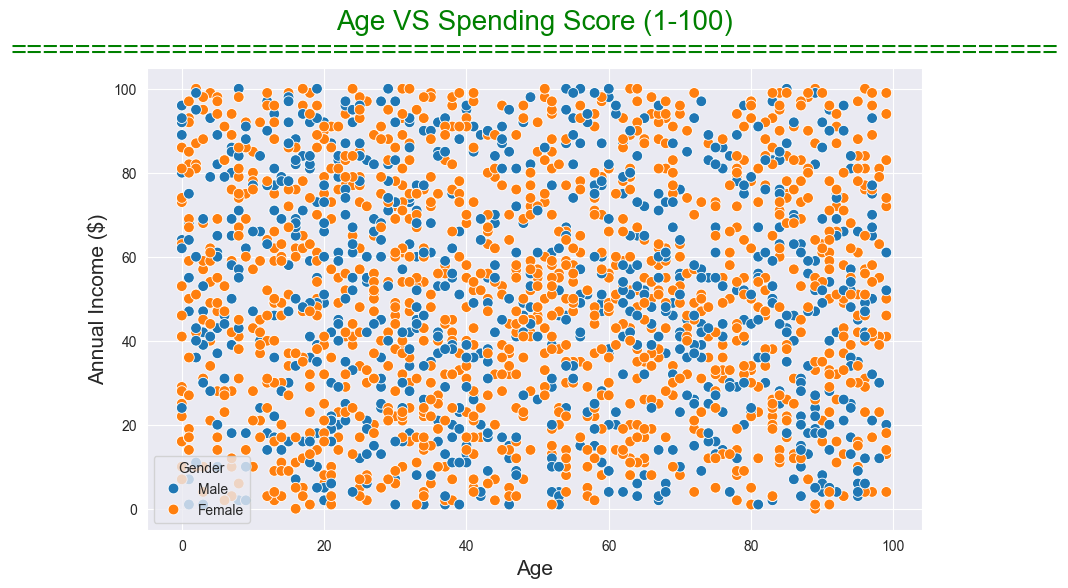

In [14]:
# Age VS Anual Income

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Age", y= "Spending Score (1-100)", hue="Gender", s=60)
plt.title("Age VS Spending Score (1-100)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income ($)", fontsize=15)
plt.show()

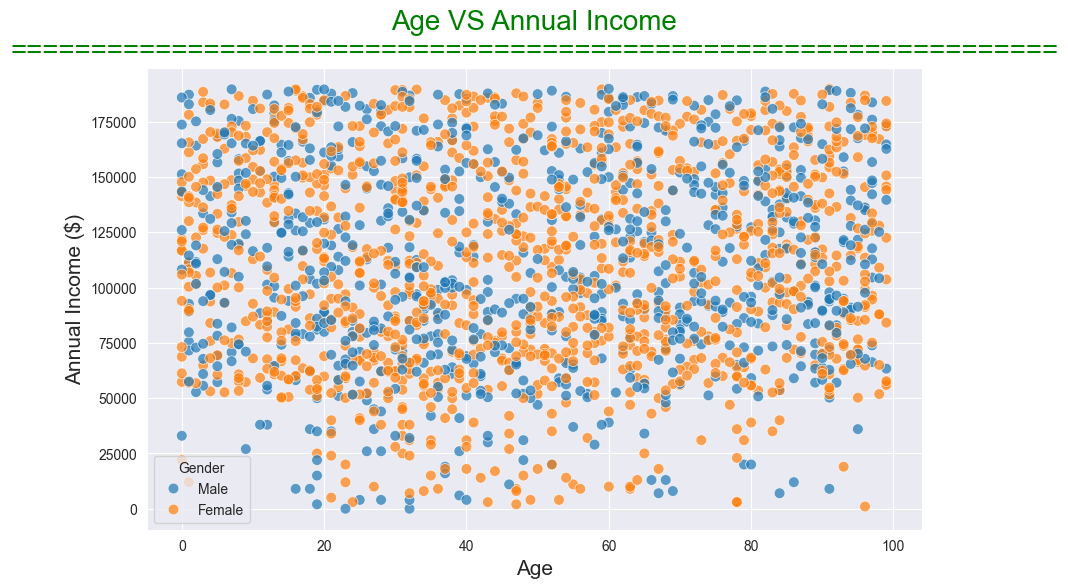

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age vs Annual Income scatter plot
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Age", y="Annual Income ($)", hue="Gender", s=60, alpha=0.7)
plt.title("Age VS Annual Income\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income ($)", fontsize=15)
plt.show()


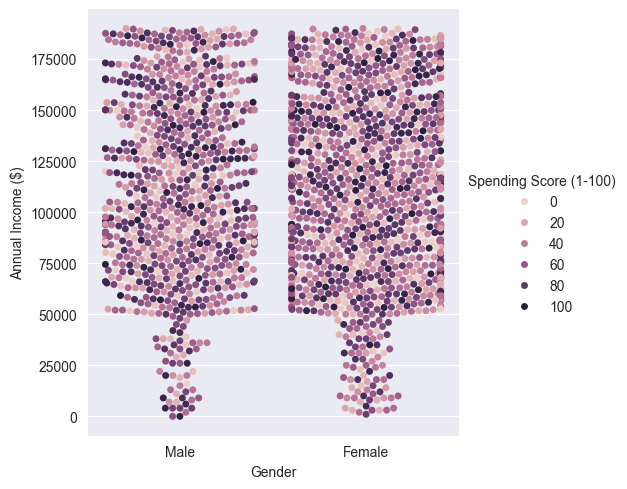

In [21]:
sns.catplot(data=df, kind="swarm", x="Gender", y="Annual Income ($)", hue="Spending Score (1-100)")

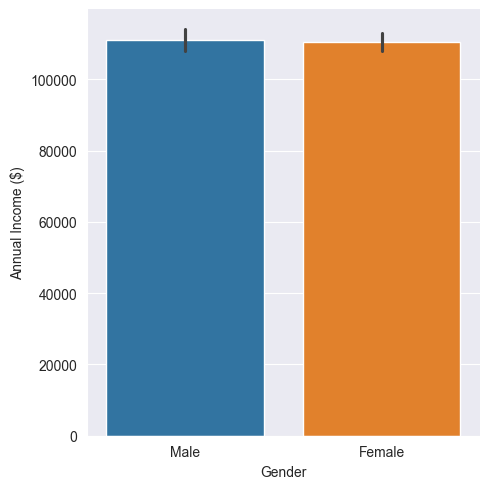

In [24]:
sns.catplot(data=df, kind="bar", x="Gender", y="Annual Income ($)", hue="Gender")

<code style="background:skyblue;color:black">3.4 Binning - Age, Income and Spending Score</code>

### Age

In [17]:
# Age -

Age_18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
Age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
Age_36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
Age_46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
Age_55_Above = df.Age[(df.Age>=56)]

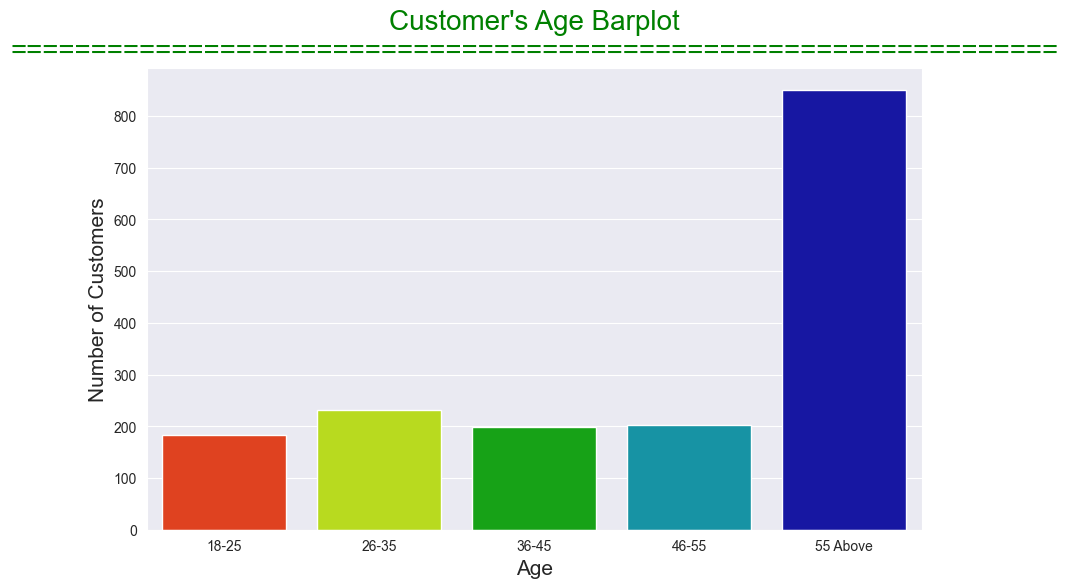

In [18]:
x = ["18-25","26-35","36-45","46-55","55 Above"]
y = [len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Customer's Age Barplot\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

### Spending Score(1-100)

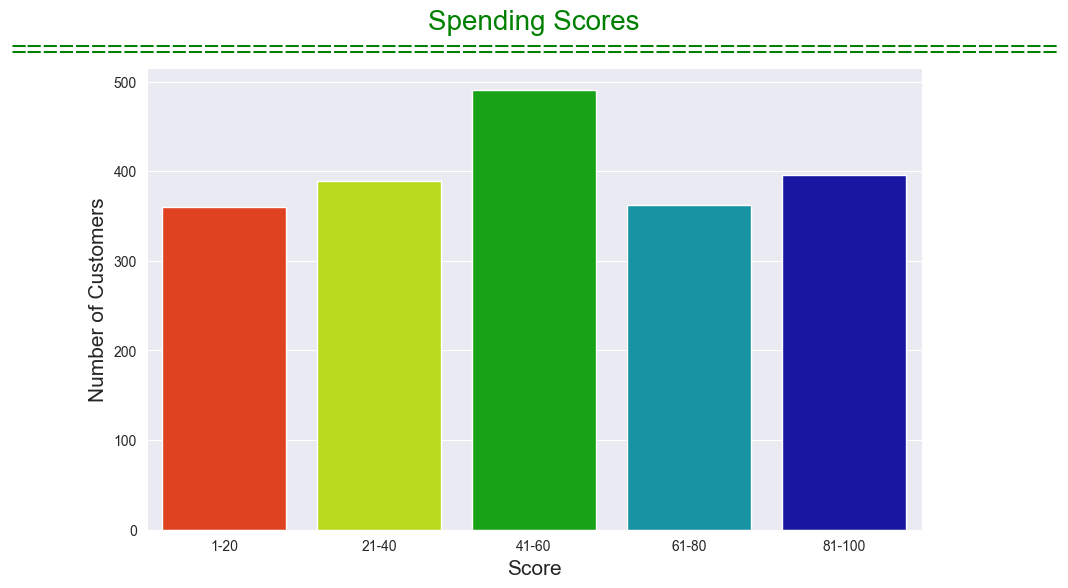

In [19]:
# Spending Score -

ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")
plt.title("Spending Scores\n=================================================================", fontsize=20, color="green")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()


### Annual Income (k$)

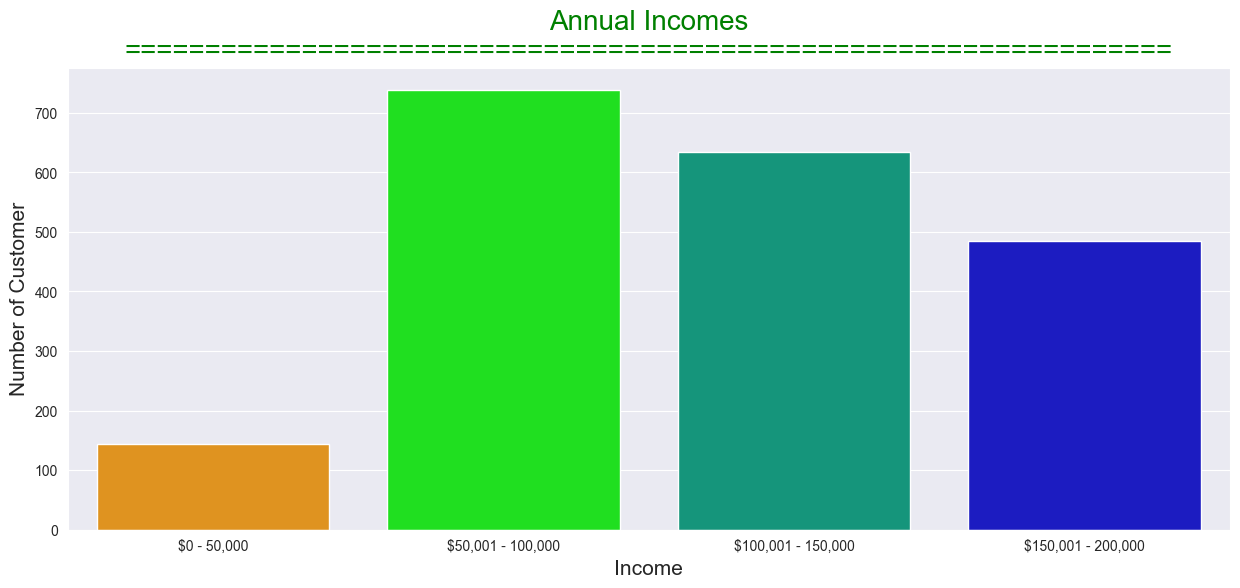

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data by matching ranges with labels
ai0_50 = df["Annual Income ($)"][(df["Annual Income ($)"] >= 0) & (df["Annual Income ($)"] <= 50000)]
ai50_100 = df["Annual Income ($)"][(df["Annual Income ($)"] >= 50001) & (df["Annual Income ($)"] <= 100000)]
ai100_150 = df["Annual Income ($)"][(df["Annual Income ($)"] >= 100001) & (df["Annual Income ($)"] <= 150000)]
ai150_200 = df["Annual Income ($)"][(df["Annual Income ($)"] >= 150001) & (df["Annual Income ($)"] <= 200000)]

# Define income ranges for plotting
income_x = ["$0 - 50,000", "$50,001 - 100,000", "$100,001 - 150,000", "$150,001 - 200,000"]

# Count number of customers in each range
income_y = [len(ai0_50), len(ai50_100), len(ai100_150), len(ai150_200)]

# Create the bar plot
plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes\n=================================================================", fontsize=20, color="green")
plt.xlabel("Income", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()


<p style="background:black">
    <code style="background:black;color:white">4. Rescaling</code></p>

In [24]:
df_scaled = df[["Age","Annual Income ($)","Spending Score (1-100)"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)

In [25]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income ($)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income ($),Spending Score (1-100)
0,-1.054089,-2.093501,-0.428339
1,-0.983723,-1.656133,1.075546
2,-1.018906,-0.540845,-1.609962
3,-0.913356,-1.131292,0.932319
4,-0.631891,-1.590528,-0.392532


In [26]:
var_list = df_scaled_fit[["Annual Income ($)","Spending Score (1-100)"]]
var_list

,Annual Income ($),Spending Score (1-100)
0,-2.093501,-0.428339
1,-1.656133,1.075546
2,-0.540845,-1.609962
3,-1.131292,0.932319
4,-1.590528,-0.392532
...,...,...
1995,1.610720,-0.392532
1996,-0.821679,-0.678986
1997,-0.432356,-1.323508
1998,1.560904,-1.681576


<p style="background:black">
    <code style="background:black;color:white">5. Model Building</code></p>

In [60]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50) #for once take 50 rows
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=4)

In [61]:
var_list

,Annual Income ($),Spending Score (1-100)
0,-2.093501,-0.428339
1,-1.656133,1.075546
2,-0.540845,-1.609962
3,-1.131292,0.932319
4,-1.590528,-0.392532
...,...,...
1995,1.610720,-0.392532
1996,-0.821679,-0.678986
1997,-0.432356,-1.323508
1998,1.560904,-1.681576


In [62]:
kmeans.labels_ #the main data are catagorized 3rd

array([1, 2, 1, ..., 1, 3, 2])

In [63]:
# Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(var_list)

    ssd.append(kmeans.inertia_)

In [64]:
ssd

[4000.000000000001,
 2543.9783380576687,
 1606.9155627976934,
 1099.665762961598,
 922.0206891974622,
 778.2069624295161,
 668.2447584269746,
 583.8478165473907,
 501.70357573528366,
 446.99474045099976]

<p style="background:black">
    <code style="background:black;color:white">6. Finding the Optimal Number of Clusters</code></p>

### The elbow curve

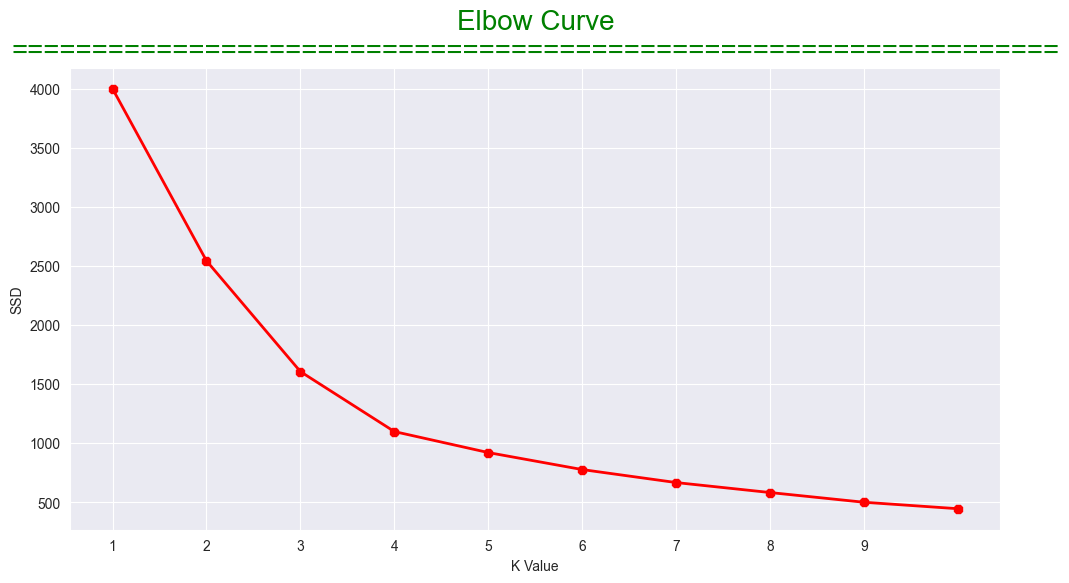

In [65]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("SSD")

plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - From the above Elbow curve we will take the value of K=5 and rebuild the cluster.</code>

In [66]:
# K=5

kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=5)

In [67]:
kmeans.labels_

array([2, 4, 2, ..., 2, 0, 1])

In [68]:
df["Label"] = kmeans.labels_

In [69]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Label
0,1,Male,19,15000,39,2
1,2,Male,21,35000,81,4
2,3,Female,20,86000,6,2
3,4,Female,23,59000,77,4
4,5,Female,31,38000,40,2


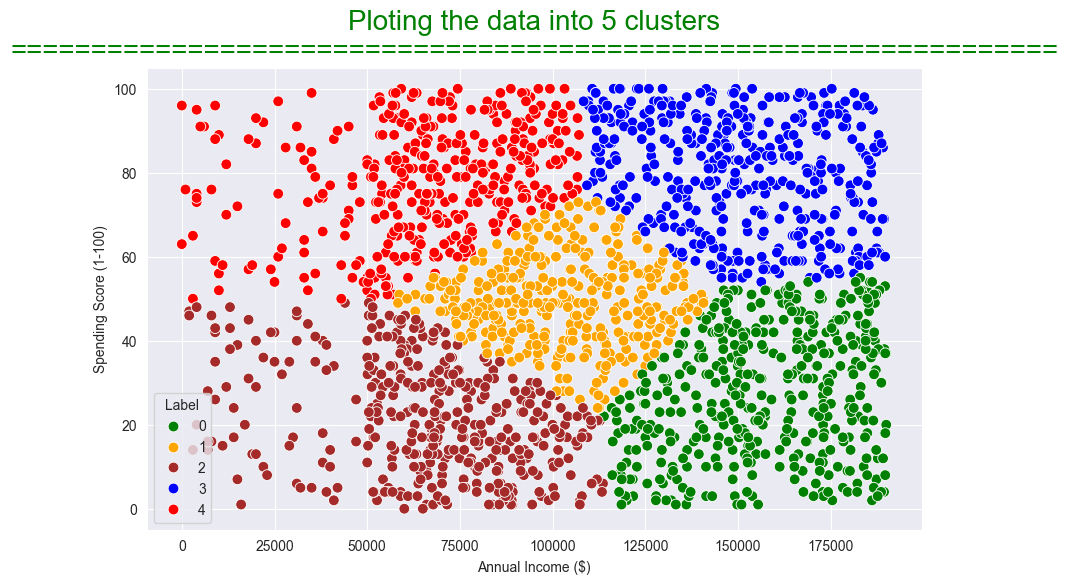

In [70]:
# ScatterPlot when K=5

plt.figure(figsize=(10,6))

plt.title("Ploting the data into 5 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=df, x="Annual Income ($)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - From the above we can see that the data has been clustered into 5 different parts.</code>

In [71]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Label
0,1,Male,19,15000,39,2
1,2,Male,21,35000,81,4
2,3,Female,20,86000,6,2
3,4,Female,23,59000,77,4
4,5,Female,31,38000,40,2


<p style="background:black">
    <code style="background:black;color:white">7. Clustering on the basis of 3 features.</code></p>

In [72]:
var_list_1 = df_scaled_fit[["Age","Annual Income ($)","Spending Score (1-100)"]]

In [73]:
var_list_1.head()

,Age,Annual Income ($),Spending Score (1-100)
0,-1.054089,-2.093501,-0.428339
1,-0.983723,-1.656133,1.075546
2,-1.018906,-0.540845,-1.609962
3,-0.913356,-1.131292,0.932319
4,-0.631891,-1.590528,-0.392532


In [101]:
# Model Fitting

kmeans1 = KMeans(n_clusters=6, max_iter=50)
kmeans1.fit(var_list_1)

KMeans(max_iter=50, n_clusters=6)

In [114]:
kmeans1.labels_

In [103]:
df["Label"] = kmeans1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Label
0,1,Male,19,15000,39,4
1,2,Male,21,35000,81,4
2,3,Female,20,86000,6,2
3,4,Female,23,59000,77,4
4,5,Female,31,38000,40,4


In [104]:
# Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans1.fit(var_list_1)

    ssd.append(kmeans1.inertia_)

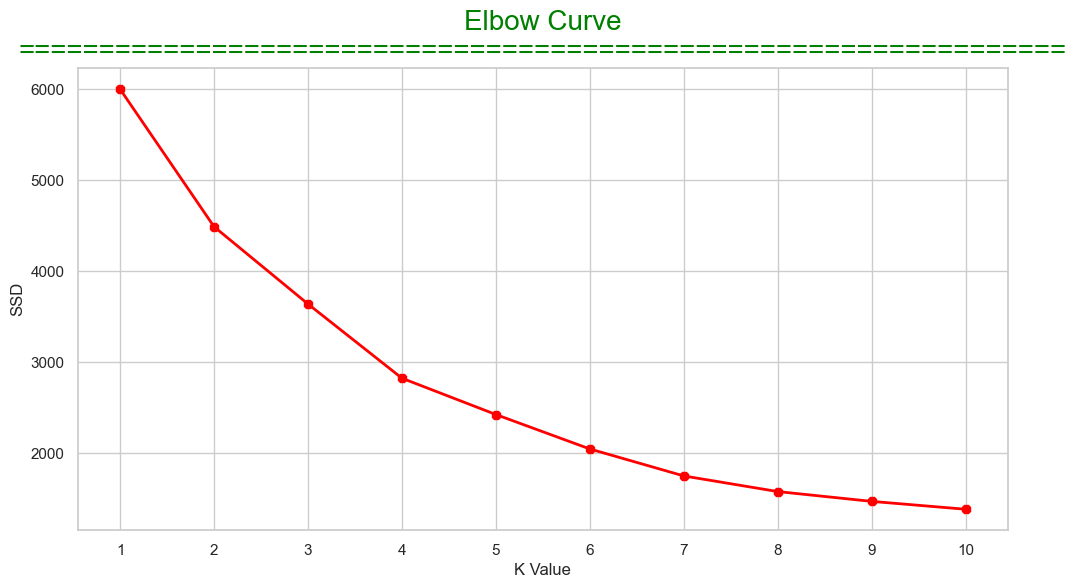

In [107]:
# Elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

In [100]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income ($)',z='Spending Score (1-100)', color='Label')
fig.show()

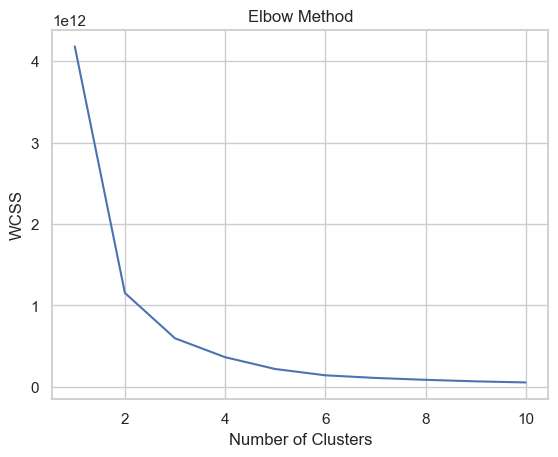

In [118]:
X = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']].values

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [119]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

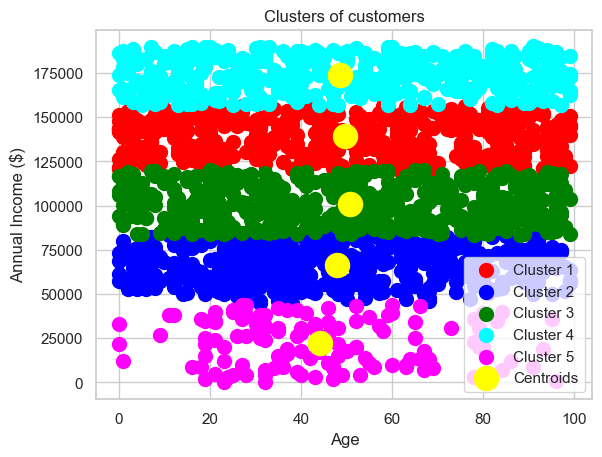

In [120]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.legend()
plt.show()